In [30]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [31]:
df = pd.read_excel("/content/bankruptcy-prevention.xlsx")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


The data file contains 7 features about 250 companies

The data set includes the following variables:

1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.

2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.

3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.

4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.

5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.

6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

7.	class: bankruptcy, non-bankruptcy (target variable).


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [33]:
df.shape

(250, 7)

In [34]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.isnull().sum()

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [36]:
# Checking the unique values in the 'class' column
print(df['class'].unique())

['bankruptcy' 'non-bankruptcy']


In [37]:
# Mapping the values to 0 and 1
df['class'] = df['class'].map({'bankruptcy': 0, 'non-bankruptcy': 1})
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [38]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


IN this correlation matrix we can see no columns are correlated to each other neither input variables

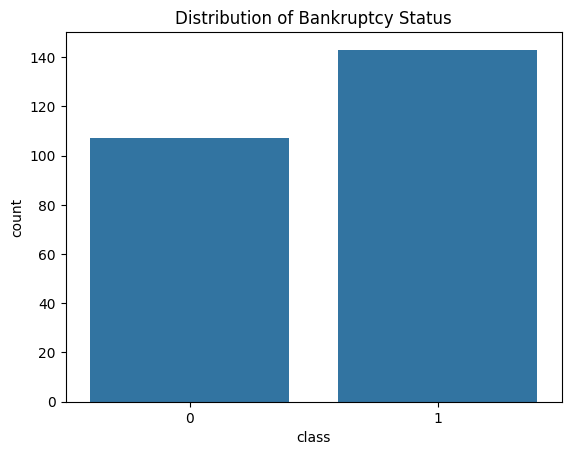

In [39]:
# Countplot for the target variable
plt.figure()
sns.countplot(x='class', data=df)
plt.title("Distribution of Bankruptcy Status")
plt.show()

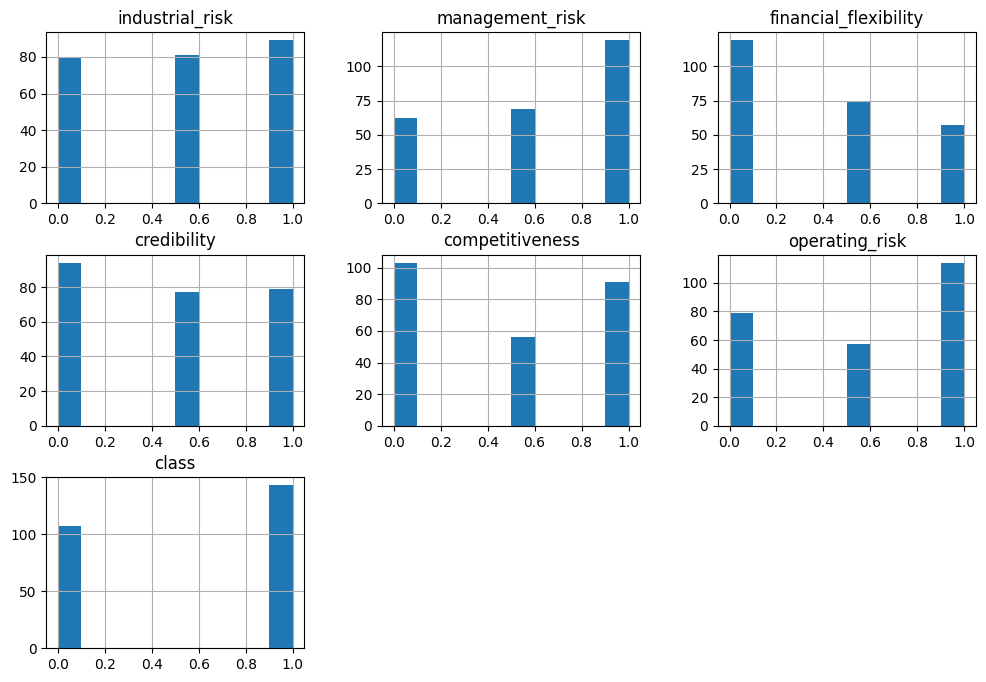

In [40]:
# Histograms for numerical features
# Univariate Histograms
df.hist(figsize=(12, 8))
plt.show()

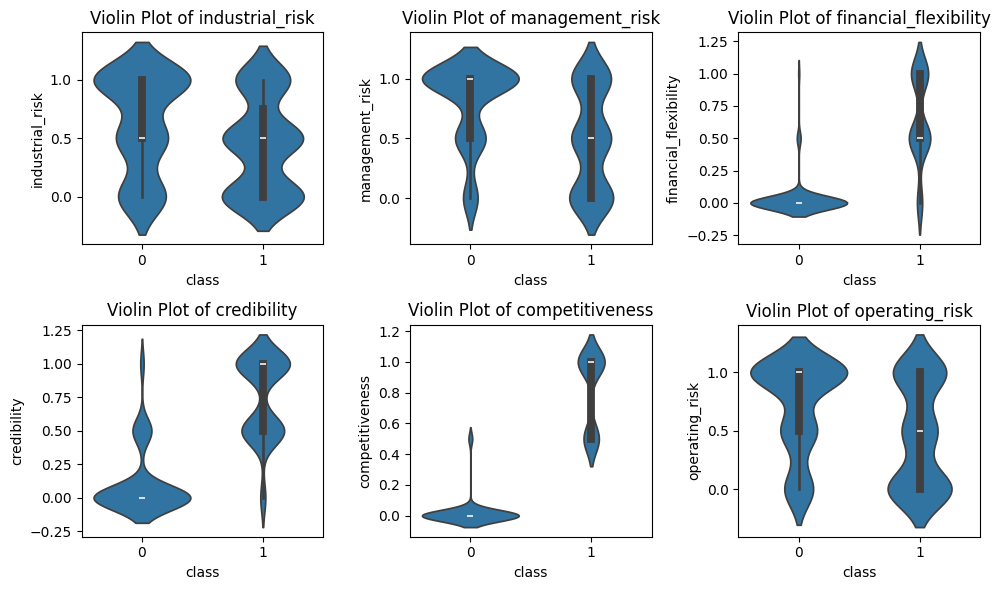

In [41]:
# Violin Plots
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns[:-1]):
  plt.subplot(2, 3, i + 1)
  sns.violinplot(x='class', y=column, data=df)
  plt.title(f'Violin Plot of {column}')
  plt.tight_layout()
plt.show()

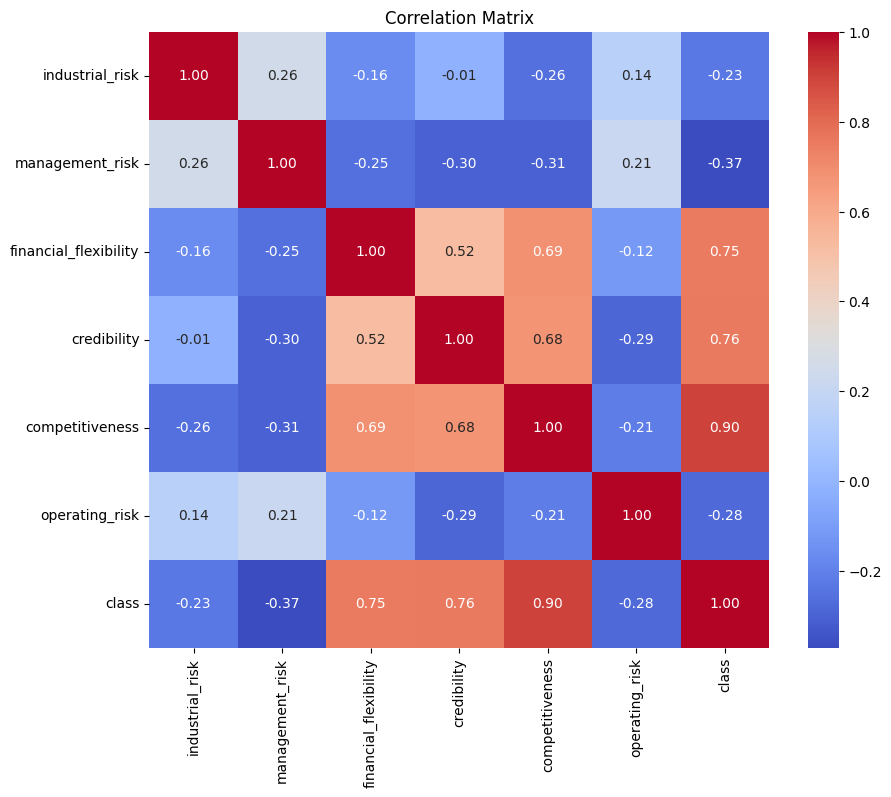

In [42]:
# Correlation matrix to check relationships between variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Visualizing the distribution of risk and flexibility features
features = ['industrial_risk', 'management_risk', 'financial_flexibility',
            'credibility', 'competitiveness', 'operating_risk']

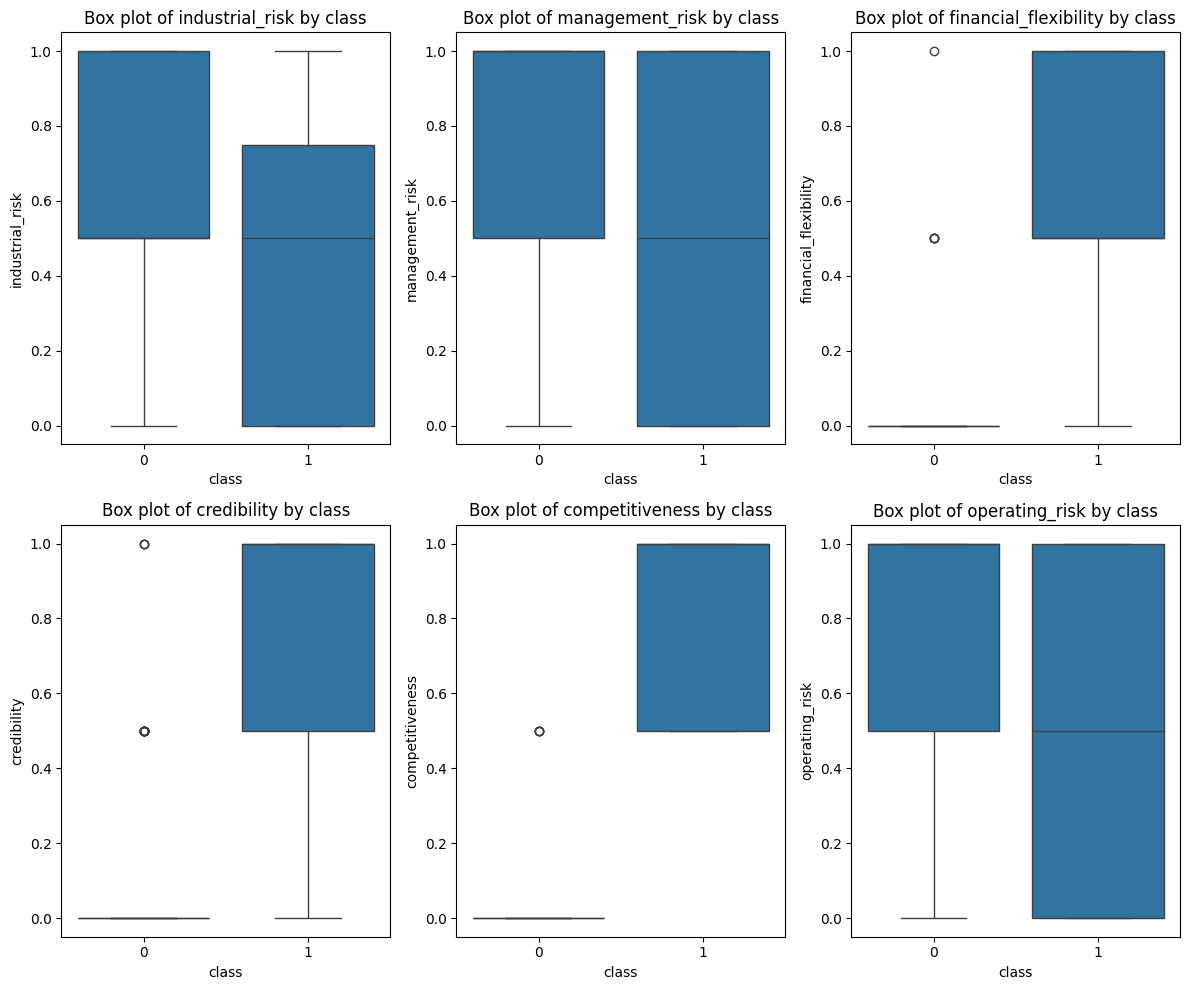

In [44]:
# Box plots for feature distributions by class
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'Box plot of {feature} by class')

plt.tight_layout()
plt.show()

## Model Building

Train Test split Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset

In [45]:
# Split the data into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [48]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1, roc_auc])
print("Model Results:")
print("-" * 80)
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])
print(results_df)

Model Results:
--------------------------------------------------------------------------------
                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0     Logistic Regression      1.00        1.0  1.000000  1.000000  1.000000
1  Support Vector Machine      1.00        1.0  1.000000  1.000000  1.000000
2           Random Forest      1.00        1.0  1.000000  1.000000  1.000000
3           Decision Tree      0.98        1.0  0.965517  0.982456  0.982759
4     K-Nearest Neighbors      0.98        1.0  0.965517  0.982456  0.982759


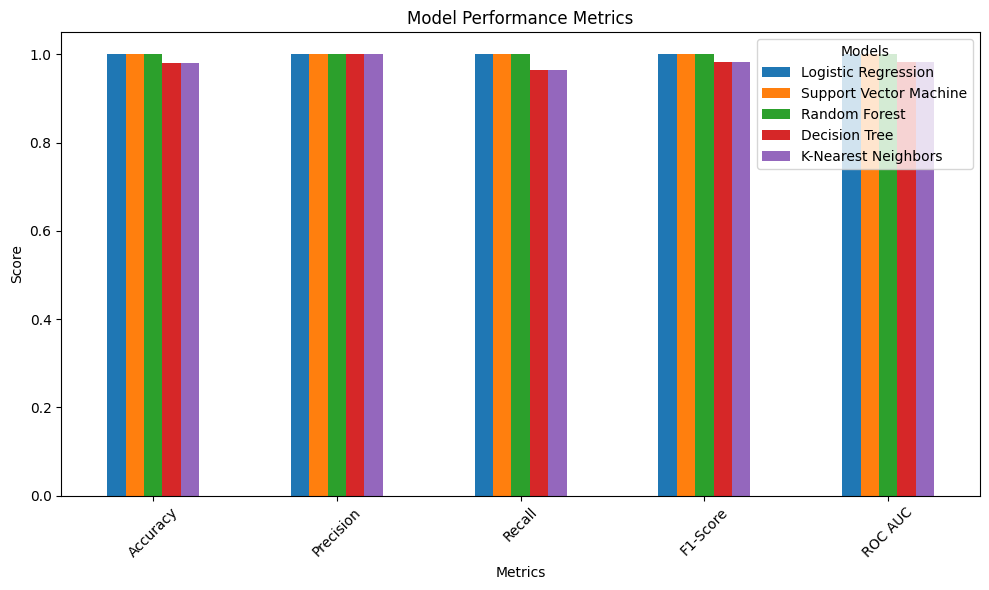

In [49]:
# Transpose the DataFrame for easier plotting
results_df_transposed = results_df.set_index('Model').transpose()

# Create a bar plot for each metric
ax = results_df_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

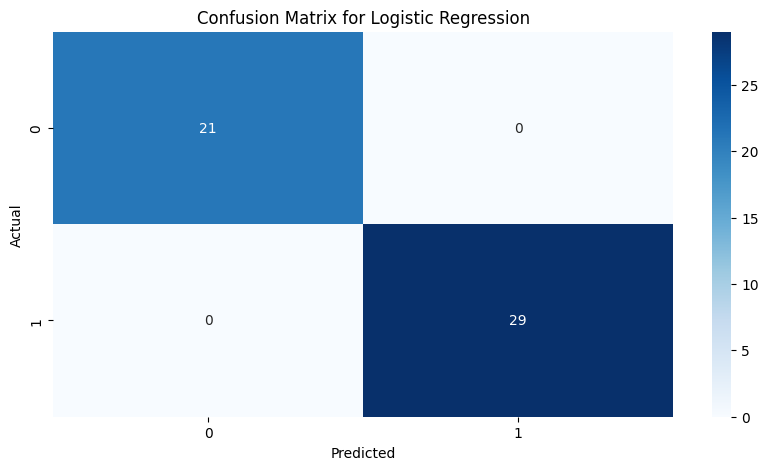

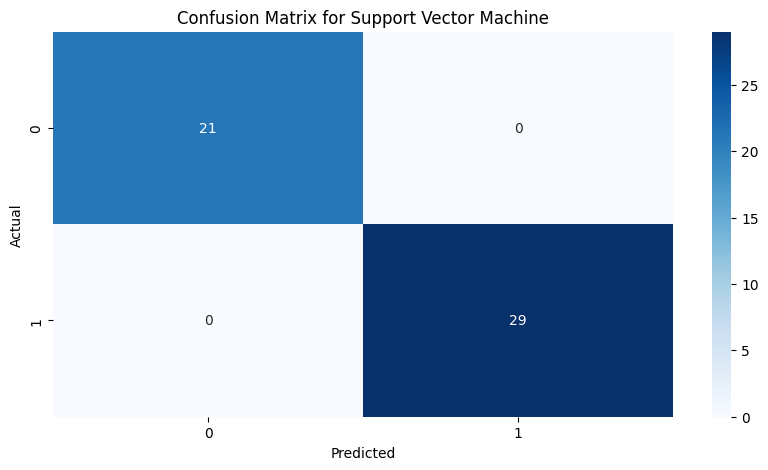

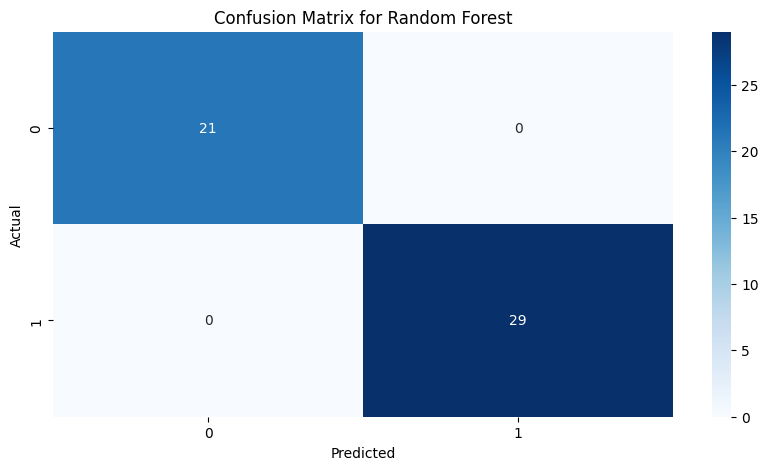

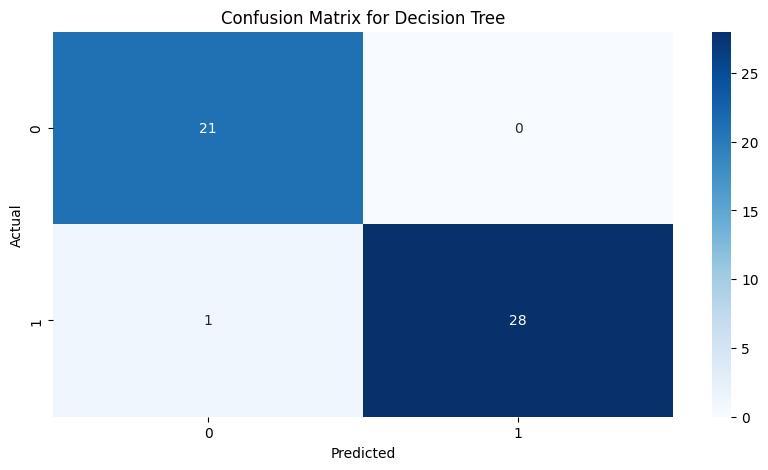

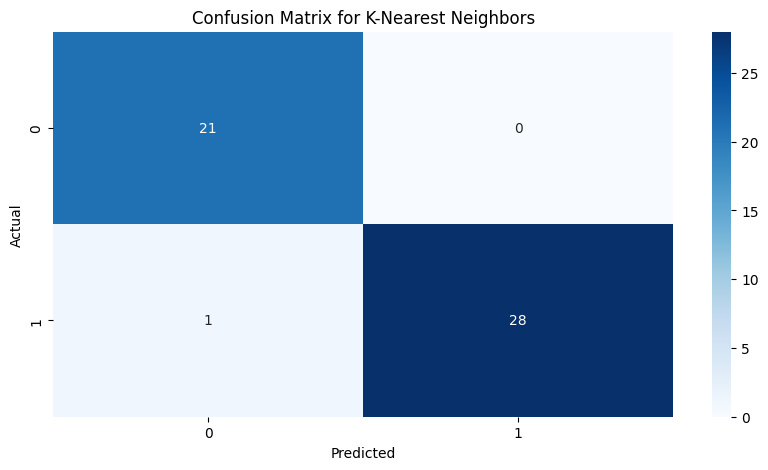

In [50]:
# plot matrix  for all model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

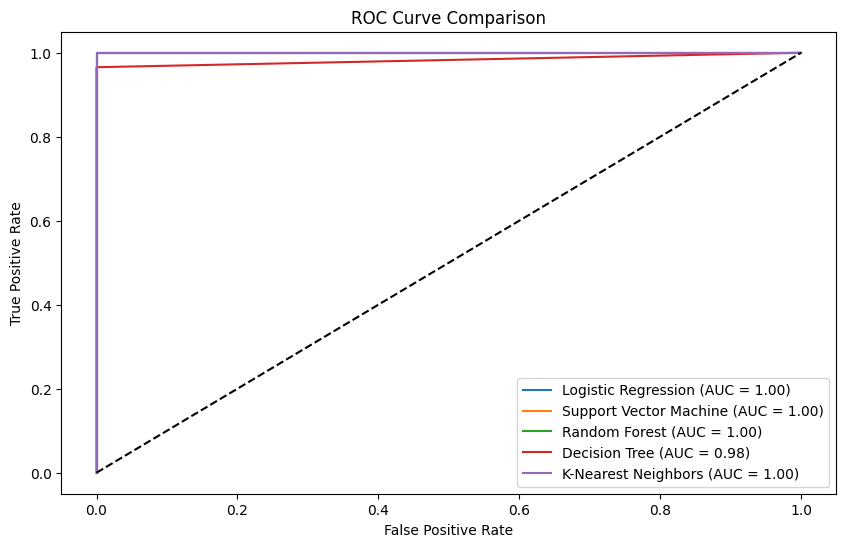

In [51]:
# plot auc for model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Deployment Bankruptcy Prediction App using RandomForestClassifier

In [52]:
!pip install -q streamlit

In [53]:
%%writefile RandomFores.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Title of the app
st.title('Bankruptcy Prediction App')

# Sidebar for user inputs
st.sidebar.header('Input Company Risk Factors')

# Function to take user inputs
def user_input_features():
    industrial_risk = st.sidebar.selectbox('Industrial Risk', ['Low', 'Medium', 'High'], index=1)
    management_risk = st.sidebar.selectbox('Management Risk', ['Low', 'Medium', 'High'], index=1)
    financial_flexibility = st.sidebar.selectbox('Financial Flexibility', ['Low', 'Medium', 'High'], index=1)
    credibility = st.sidebar.selectbox('Credibility', ['Low', 'Medium', 'High'], index=1)
    competitiveness = st.sidebar.selectbox('Competitiveness', ['Low', 'Medium', 'High'], index=1)
    operating_risk = st.sidebar.selectbox('Operating Risk', ['Low', 'Medium', 'High'], index=1)

    # Convert categorical inputs into numerical values (for model compatibility)
    risk_mapping = {'Low': 0.0, 'Medium': 0.5, 'High': 1.0}

    data = {
        'industrial_risk': risk_mapping[industrial_risk],
        'management_risk': risk_mapping[management_risk],
        'financial_flexibility': risk_mapping[financial_flexibility],
        'credibility': risk_mapping[credibility],
        'competitiveness': risk_mapping[competitiveness],
        'operating_risk': risk_mapping[operating_risk]
    }

    features = pd.DataFrame(data, index=[0])
    return features

# Get user input
input_df = user_input_features()

# Display user input parameters
st.subheader('User Input Parameters')
st.write(input_df)

# For demonstration, training a new model
# Load dataset
df = pd.read_excel('bankruptcy-prevention.xlsx')

# Preprocess data
X = df.drop('class', axis=1)
y = df['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_scaled, y)

# Scale the input data
input_scaled = scaler.transform(input_df)

# Make prediction
prediction = model.predict(input_scaled)
prediction_proba = model.predict_proba(input_scaled)

# Display prediction results
st.subheader('Prediction')
if prediction[0] == 'non-bankruptcy':
    st.write('Non-Bankrupt')
else:
    st.write('Bankrupt')

st.subheader('Prediction Probability')
st.write(prediction_proba)


Overwriting RandomFores.py


In [54]:
!npm install localtunnel


up to date, audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [55]:
!streamlit run logisticdep.py &>/content/logs.txt &

In [56]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.46.17.2


In [57]:
!npx localtunnel --port 8501

your url is: https://plenty-feet-fetch.loca.lt
34.46.17.2
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:28619 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:513:28)
    at emitErrorNT (node:internal/streams/destroy:157:8)
    at emitErrorCloseNT (node:internal/streams/destroy:122:3)
    at processTicksAndRejections (node:internal/process/task_queues:83:21)
